# Important Libraries

1. transformers: Load models and handle NLP tasks.  
2. bitsandbytes: Efficient memory usage during training.
3. accelerate: Speed up training and inference.
4. gradio: Create interactive UIs.
5. gTTS: Convert text to speech (Google Text-to-Speech).
6. whisper: Recognize speech (OpenAI's).

In [1]:
!pip install -q -U transformers==4.37.2 # Transformers library for model loading and NLP tasks
!pip install -q -U bitsandbytes==0.41.1 accelerate==0.21.0 # bitsandbytes for memory-efficient training, and accelerate for faster model training and inference
!pip install -q gradio gTTs # Gradio for creating interactive UIs and gTTS (Google Text-to-Speech) for converting text to speech
!pip install -q git+https://github.com/openai/whisper.git  # Whisper library from OpenAI's GitHub repository for speech recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8

In [20]:
#@title Import Required Libraries
import os
import re
import nltk
import torch
import base64
import whisper
import datetime
import requests
import numpy as np
import gradio as gr
from gtts import gTTS
from PIL import Image
from nltk.tokenize import sent_tokenize
from transformers import BitsAndBytesConfig, pipeline
from IPython.display import Markdown, display

nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Model Pipeline

LLaVA is an open-source chatbot trained by fine-tuning LLaMA/Vicuna on GPT-generated multimodal instruction-following data. It is an auto-regressive language model, based on the transformer architecture.

In [8]:
#@title Quantize the Config for Model pipeline

quantization_config = BitsAndBytesConfig(
    load_in_4bit = True,
    bnb_4bit_compute_dtype = torch.float16)

MODEL_ID = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text",
                model = MODEL_ID,
                model_kwargs = {"quantization_config" : quantization_config})

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [9]:
#@title Check for GPU Enabled
torch.cuda.is_available()

Device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"torch using {torch.__version__}, ({Device})")

torch using 2.3.1+cu121, (cuda)


# Test the Model


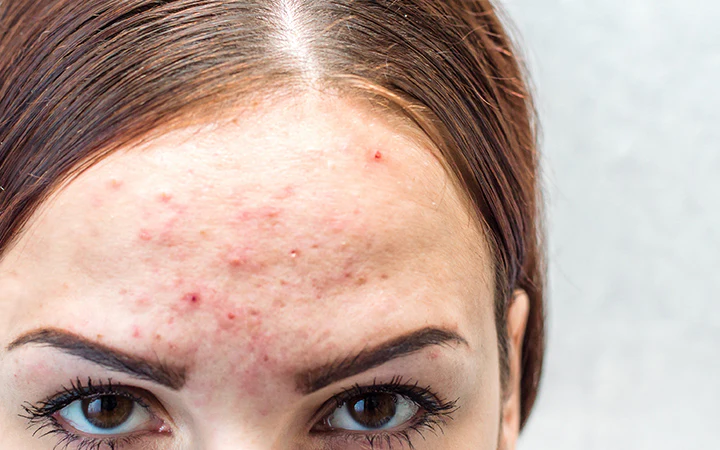

In [12]:
#@title Load the Image
image_path = '/content/Evidence-Based_2801e9e5-edd5-4d76-b66f-57a55bb780c0_1024x1024.png'
image = Image.open(image_path)
image

In [45]:
#@title Create the Prompt Template

max_tokens = 250
prompt_template = """
Describe the Image using as much as detailed as possible.
Generate a clear and helpful summary or answer related to the image based on your description.
As You are a Helpful Assistant who is able to answer questions about the image.
What is the Image all about ?
Now generate a helpful answer about the image
"""
prompt = "User: <image>\n" + prompt_template + "\nAssistant: \n\n"


In [46]:
#@title Generate the Response from the Model
response = pipe(image,
                prompt = prompt,
                generate_kwargs = {"max_new_tokens" : max_tokens})

for sent in sent_tokenize(response[0]["generated_text"]):
  print(sent)

User:  

Describe the Image using as much as detailed as possible.
Generate a clear and helpful summary or answer related to the image based on your description.
As You are a Helpful Assistant who is able to answer questions about the image.
What is the Image all about ?
Now generate a helpful answer about the image

Assistant: 

The image features a woman with a blemished face, possibly due to acne or other skin issues.
She has a noticeable bump on her forehead, which is a prominent feature of her appearance.
The woman is looking directly at the camera, capturing her unique facial features.
The image provides a close-up view of her face, allowing the viewer to appreciate the details of her skin condition.


# Model Deploy

In [53]:
#@title Loading the Model from Whisper
model = whisper.load_model("medium", device = Device)

print(
    f"Model is {'multilingual' if model.is_multilingual else 'English only'} "
    f"and has {sum(n.numel() for n in model.parameters()):,} parameters."
     )

Model is multilingual and has 762,321,920 parameters.


In [55]:
#@title Logger File
tstamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tstamp = str(tstamp).replace(" ","_")
logfile = f"log_{tstamp}.txt"

# define the fuction to write
def writehistory(text):
  with open(logfile, "a", encoding = "utf-8") as f:
    f.write(text +"\fake")
    f.write("\n")
  f.close()

In [66]:
def image_2_text(input_image, input_text):
    # Load the image
    image = Image.open(input_image)

    writehistory(f"Input Image: {input_image} - Type: {type(input_image)} - Dir: {os.path.dirname(input_image)}")

    # Determine the prompt Instructions based on the type of input_text
    if type(input_text) == tuple:
        prompt_template = """
        Describe the Image using as much detail as possible.
        Generate a clear and helpful summary or answer related to the image based on your description.
        As you are a Helpful Assistant who is able to answer questions about the image.
        What is the Image all about ?
        Now generate a helpful answer about the image.
        """ + ' '.join(input_text)
    else:
        prompt_template = """
        Act as an expert in imagery descriptive analysis. Using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"Prompt: {prompt_template}")

    # Format the final prompt
    prompt = "USER: <image>\n" + prompt_template + "\nASSISTANT:\n"

    # Generate the Response from the model
    response = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 250})

    # Extract the Response text Properly
    if response is not None and len(response[0]["generated_text"]) > 0:
        match = re.search(r"ASSISTANT:\s*(.*)", response[0]["generated_text"])
        if match:
            # Extract the text after "ASSISTANT:"
            reply = match.group(1).strip()
        else:
            reply = "No Response Found"
    else:
        reply = "No Response Generated"

    return reply


In [67]:
#@title Trancribe the Audio

def transcribe(audio):
    # Check if the audio input is None or empty
    if audio is None or audio == "":
        return '', '', None  # Return empty strings and None for Audio File

    # Load and Process the Audio
    audio_data = whisper.load_audio(audio)
    audio_data = whisper.pad_or_trim(audio_data)

    # Generate the Mel Spectrogram
    mel = whisper.log_mel_spectrogram(audio_data).to(model.device)

    # Detect Language
    _, probs = model.detect_language(mel)
    detected_language = max(probs, key=probs.get)
    writehistory(f"Detected Language: {detected_language}")

    # Decode the Audio
    options = whisper.DecodingOptions()
    results = whisper.decode(model, mel, options)
    results_text = results.text

    return results_text, detected_language  # Return text and detected language if needed

In [58]:
#@title Text-to-Speech Generation
def text_2_speech(text, file_path):
    language = 'en'

    audio_obj = gTTS(text = text,
                     lang = language,
                     slow = False)
    audio_obj.save(file_path)

    return file_path

In [59]:
#@title Before Running the Pipeline
import locale
print(locale.getlocale())

locale.getpreferredencoding = lambda: "UTF-8"

('en_US', 'UTF-8')


#FFmpeg Command: Create a 10-second silent MP3 file.

* f lavfi: Use a filter as an input.




* i anullsrc=r=44100:cl=mono: Generate silent audio with a sample rate of 44100 Hz in mono.
* t 10: Set the duration of the audio to 10 seconds.
* q:a 9: Set the audio qu
ality level to 9 (lower quality, smaller file size).
* acodec libmp3lame: Encode the audio using the MP3 format.
* Temp.mp3: Output file name.

In [60]:
# Run the FFmpeg Command
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [82]:
#@title Process The Inputs

def process_inputs(audio_path, image_path, confidence_threshold, include_image_analysis, selected_option):
    # Process the audio file
    speech_to_text_output = transcribe(audio_path)  # Assuming transcribe() is defined

    # Prepare the AI response based on the image
    if include_image_analysis and image_path:
        chatgpt_output = image_2_text(image_path, speech_to_text_output)  # Assuming image_2_text() is defined
    else:
        chatgpt_output = "Image analysis not included."

    # Convert the AI output to Speech and save it as an audio file
    processed_audio_path = text_2_speech(chatgpt_output, "Temp.mp3")  # Assuming text_2_speech() is defined

    # Debug info or additional processing can be handled here
    debug_info = {
        "confidence_threshold": confidence_threshold,
        "selected_option": selected_option,
        "include_image_analysis": include_image_analysis
    }

    return speech_to_text_output, chatgpt_output, processed_audio_path, None, debug_info


In [81]:
import gradio as gr

iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources="microphone", type="filepath"),
        gr.Image(type="filepath"),
        gr.Slider(minimum=0, maximum=10, value=5, label="Confidence Threshold"),
        gr.Checkbox(label="Include Image Analysis"),
        gr.Dropdown(choices=["Option 1", "Option 2", "Option 3"], label="Select Option")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="AI Response"),
        gr.Audio(label="Generated Audio"),
        gr.Image(label="Image Analysis Result"),
        gr.JSON(label="Debug Info")
    ],
    title="LLM Powered Voice Assistance for Multimodal Data",
    description="Upload your image and interact via voice input and audio responses. Adjust settings and view additional outputs.",
    theme="default",  # Change to a valid theme if needed
    live=False  # Set to False to include the submit button
)


In [ ]:
# Launch the interface
iface.launch(debug = True)